Question 1a: How many rows have diagnosis 'B' and how many rows have diagnosis 'M'?
Counts of 'B': 357, Counts of 'M': 212

Question 1b: Plot a histogram of p0 for all the rows in the test set.


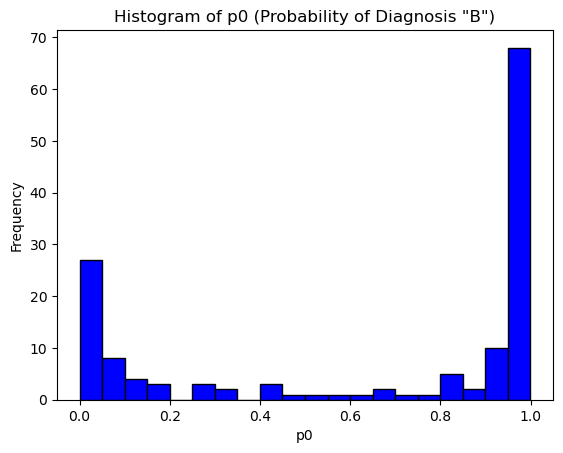


Question 1c: Compute the accuracy (the percentage of rows the model prediction is correct) and the confusion matrix for all the rows in the test set.
Accuracy (all rows): 0.06293706293706294
Confusion Matrix (all rows):
 [[ 3 86]
 [48  6]]

Question 1d: For part (d) we will restrict ourselves to just those rows in the test set such that p0 is less than 0.1 or greater than 0.9. For just these rows, compute the accuracy and the confusion matrix.
Accuracy (p0 < 0.1 or p0 > 0.9): 0.017699115044247787
Confusion Matrix (p0 < 0.1 or p0 > 0.9):
 [[ 0 76]
 [35  2]]

Question 1e: For part (e) we will restrict ourselves to just those rows in the test set such that p0 is between 0.1 and 0.9. For just these rows, compute the accuracy and the confusion matrix.
Accuracy (0.1 <= p0 <= 0.9): 0.23333333333333334
Confusion Matrix (0.1 <= p0 <= 0.9):
 [[ 3 10]
 [13  4]]

Question 1f: Based on your results in parts (c), (d), and (e), is the model more likely to make the correct prediction if p0 is far fro

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('abbwdbc.csv')

# Part (a): Count diagnosis types
counts = data['diagnosis'].value_counts()
print("Question 1a: How many rows have diagnosis 'B' and how many rows have diagnosis 'M'?")
print(f"Counts of 'B': {counts['B']}, Counts of 'M': {counts['M']}")

# Split features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis'].map({'B': 0, 'M': 1})  # Map 'B' to 0 and 'M' to 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
p0 = model.predict_proba(X_test)[:, 0]  # Probability of 'B'

# Part (b): Histogram of probabilities
print()
print("Question 1b: Plot a histogram of p0 for all the rows in the test set.")
plt.hist(p0, bins=20, color='blue', edgecolor='k')
plt.title('Histogram of p0 (Probability of Diagnosis "B")')
plt.xlabel('p0')
plt.ylabel('Frequency')
plt.show()

# Part (c): Accuracy and Confusion Matrix for all rows
y_pred_all = (p0 > 0.5).astype(int)
accuracy_all = accuracy_score(y_test, y_pred_all)
conf_matrix_all = confusion_matrix(y_test, y_pred_all)
print()
print("Question 1c: Compute the accuracy (the percentage of rows the model prediction is correct) and the confusion matrix for all the rows in the test set.")
print(f"Accuracy (all rows): {accuracy_all}")
print("Confusion Matrix (all rows):\n", conf_matrix_all)

# Part (d): Accuracy and Confusion Matrix for p0 < 0.1 or p0 > 0.9
filter_far = (p0 < 0.1) | (p0 > 0.9)
y_test_far = y_test[filter_far]
y_pred_far = y_pred_all[filter_far]
accuracy_far = accuracy_score(y_test_far, y_pred_far)
conf_matrix_far = confusion_matrix(y_test_far, y_pred_far)
print()
print("Question 1d: For part (d) we will restrict ourselves to just those rows in the test set such that p0 is less than 0.1 or greater than 0.9. For just these rows, compute the accuracy and the confusion matrix.")
print(f"Accuracy (p0 < 0.1 or p0 > 0.9): {accuracy_far}")
print("Confusion Matrix (p0 < 0.1 or p0 > 0.9):\n", conf_matrix_far)

# Part (e): Accuracy and Confusion Matrix for 0.1 <= p0 <= 0.9
filter_near = (p0 >= 0.1) & (p0 <= 0.9)
y_test_near = y_test[filter_near]
y_pred_near = y_pred_all[filter_near]
accuracy_near = accuracy_score(y_test_near, y_pred_near)
conf_matrix_near = confusion_matrix(y_test_near, y_pred_near)

print()
print("Question 1e: For part (e) we will restrict ourselves to just those rows in the test set such that p0 is between 0.1 and 0.9. For just these rows, compute the accuracy and the confusion matrix.")
print(f"Accuracy (0.1 <= p0 <= 0.9): {accuracy_near}")
print("Confusion Matrix (0.1 <= p0 <= 0.9):\n", conf_matrix_near)

# Part (f): Comparison
print()
print("Question 1f: Based on your results in parts (c), (d), and (e), is the model more likely to make the correct prediction if p0 is far from the threshold of 0.5 (so near 0 or 1, like in part (d)) than if p0 is near 0.5 (like in part (e))?")
print(f"Overall Accuracy: {accuracy_all}")
print(f"Accuracy (Far from threshold): {accuracy_far}")
print(f"Accuracy (Near threshold): {accuracy_near}")
